# Experiment 003: *Short facts*

In [1]:
'''import standard libraries'''
import numpy as np                       # mathematical methods
from matplotlib import pyplot as plt     # plotting methods within notebook
from scipy import stats                  # lots of statistical methods
import pandas as pd
import datetime
from tueplots import bundles
import json
from collections import Counter
from tabulate import tabulate
%matplobtlib inline

UsageError: Line magic function `%matplobtlib` not found.


In [2]:
import os
os.chdir('../')


from src.get_data import get_data
from src.get_data_tracks import get_data_tracks

plt.rcParams.update(bundles.neurips2021(usetex=False))

## Hypothesis:

We want to get some short facts about the playlists, like for example:
- What is the average playlist length (tracks and duration)
- What is the number of unique tracks?
- What is the number of unique albums?
- What is the number of unique artists?
- What is the most common playlist name?

#### 1. get data + number of playlist

In [3]:
dataset = get_data(pre=True)
print(f'The computed dataset has {dataset.shape[0]:,} playlist.')

The computed dataset has 100,000 playlist.


#### 2. get data (tracks) + number of tracks

In [4]:
dataset_tracks = get_data_tracks(pre=True)
total_tracks = dataset_tracks.shape[0]
unique_tracks = len(dataset_tracks["track_uri"].unique())
ratio = total_tracks / unique_tracks
print(f'The computed dataset has {total_tracks:,} tracks (total)')
print(f'The computed dataset has {unique_tracks:,} tracks (unique)')
print(f'The ration between total and unique is {ratio}')

The computed dataset has 6,677,800 tracks (total)
The computed dataset has 681,805 tracks (unique)
The ration between total and unique is 9.794296023056447


#### 3. number of artists

In [5]:
print(f'The computed dataset has {len(dataset_tracks["artist_uri"].unique()):,} artists (unique)')

The computed dataset has 110,063 artists (unique)


#### 4. number of albums

In [6]:
print(f'The computed dataset has {len(dataset_tracks["album_uri"].unique()):,} albums (unique)')

The computed dataset has 271,413 albums (unique)


#### 5. duration

In [7]:
total_duration = dataset['duration_ms'].sum()
average_duration = total_duration/len(dataset)
print(f'The computed dataset has a total duration of {total_duration} ms')
print(f'The computed dataset has a average duration of {average_duration} ms')

The computed dataset has a total duration of 1565935156055 ms
The computed dataset has a average duration of 15659351.56055 ms


In [10]:
def convert_ms(ms:float) -> str:
    duration = datetime.timedelta(milliseconds=ms)
    return f'{duration}'

In [11]:
print(f'The computed dataset has a total duration of {convert_ms(float(total_duration))} ms')
print(f'The computed dataset has a average duration of {convert_ms(float(average_duration))} ms')

The computed dataset has a total duration of 18124 days, 5:59:16.055000 ms
The computed dataset has a average duration of 4:20:59.351561 ms


#### 6. track duration

In [12]:
average_track_duration = dataset_tracks['duration_ms'].mean()
print(f'In the computed dataset is the average duration of a track {average_track_duration} ms')

In the computed dataset is the average duration of a track 234498.6606449729 ms


In [13]:
print(f'In the computed dataset is the average duration of a track {convert_ms(average_track_duration)}')

In the computed dataset is the average duration of a track 0:03:54.498661


#### 7. figure: average track duration + average number of tracks

In [14]:
average_numtracks_timeline = []
total_tracks = 0
i = 0
for num_tracks in dataset['num_tracks']:
    total_tracks += num_tracks
    i += 1
    average_numtracks_timeline.append(total_tracks / i)
    
average_numtracks = dataset['num_tracks'].mean()

In [15]:
total_dur = 0
i = 0
average_duration_timeline = []

for duration_ms in dataset['duration_ms']:
    total_dur += duration_ms
    i += 1
    average_duration_timeline.append(total_dur/i)
    
average_duration = dataset['duration_ms'].mean()

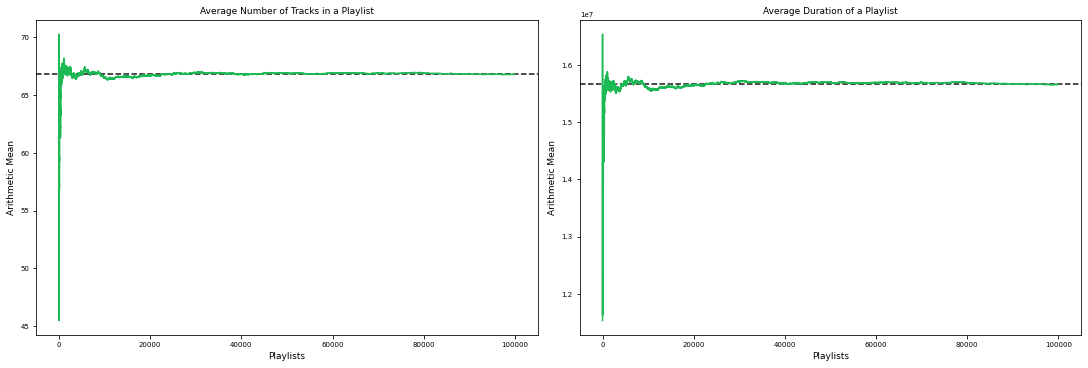

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].axhline(y=average_numtracks, color='#191414', linestyle='--')
axs[0].plot(average_numtracks_timeline, color='#1DB954')
axs[0].set_title('Average Number of Tracks in a Playlist')
axs[0].set_xlabel('Playlists')
axs[0].set_ylabel('Arithmetic Mean')

axs[1].axhline(y=average_duration, color='#191414', linestyle='--')
axs[1].plot(average_duration_timeline, color='#1DB954')
axs[1].set_title('Average Duration of a Playlist')
axs[1].set_xlabel('Playlists')
axs[1].set_ylabel('Arithmetic Mean')

plt.savefig('doc/fig/averageTrack.pdf', bbox_inches='tight')
plt.show()

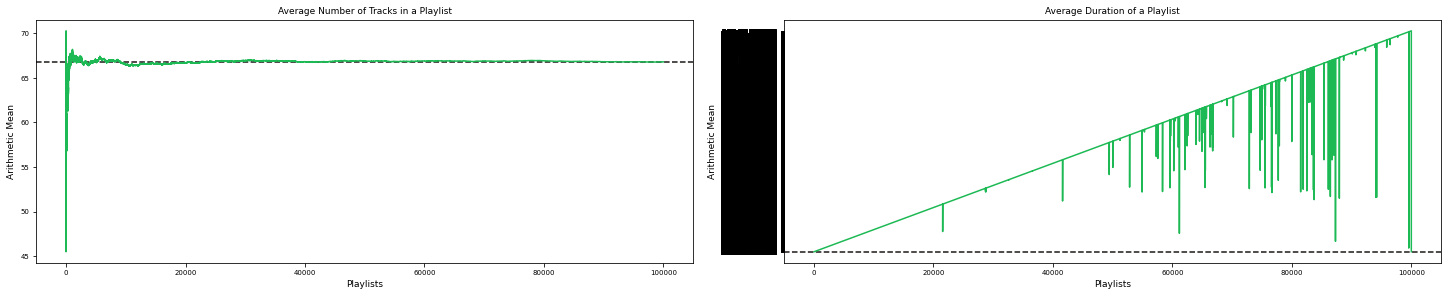

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(20, 4))

axs[0].axhline(y=average_numtracks, color='#191414', linestyle='--')
axs[0].plot(average_numtracks_timeline, color='#1DB954')
axs[0].set_title('Average Number of Tracks in a Playlist')
axs[0].set_xlabel('Playlists')
axs[0].set_ylabel('Arithmetic Mean')

axs[1].axhline(y=convert_ms(average_duration), color='#191414', linestyle='--')
converted = []
for entry in average_duration_timeline:
    converted.append(convert_ms(entry))
axs[1].plot(converted, color='#1DB954')
axs[1].set_title('Average Duration of a Playlist')
axs[1].set_xlabel('Playlists')
axs[1].set_ylabel('Arithmetic Mean')

plt.show()

#### 8. top ten tracks, album, artists

In [34]:
top_15_tracks = []

col_track_uris = Counter(dataset_tracks['track_uri'])
for i, uri in enumerate(col_track_uris.most_common(15)):
    tmp = dataset_tracks.loc[dataset_tracks['track_uri'] == uri[0]]
    #['Pos', 'Playlists', 'Track', 'Album', 'Artist']
    top_15_tracks.append([i+1, uri[1], tmp['track_name'].values[0], tmp['album_name'].values[0], tmp['artist_name'].values[0]])

In [30]:
top_15_album = []

col_album_uris = Counter(dataset_tracks['album_uri'])
for i, uri in enumerate(col_album_uris.most_common(15)):
    tmp = dataset_tracks.loc[dataset_tracks['album_uri'] == uri[0]]
    #['Pos', 'Playlists', 'Album', 'Artist']
    top_15_album.append([i+1, uri[1], tmp['album_name'].values[0], tmp['artist_name'].values[0]])

In [28]:
top_15_artists = []

col_artists_uris = Counter(dataset_tracks['artist_uri'])
for i, uri in enumerate(col_artists_uris.most_common(15)):
    tmp = dataset_tracks.loc[dataset_tracks['artist_uri'] == uri[0]]
    #['Pos', 'Playlists', 'Artist']
    top_15_artists.append([i+1, uri[1], tmp['artist_name'].values[0]])

In [36]:
# print

print("Popular Tracks:")
print(tabulate(top_15_tracks, headers=['Pos', 'Playlists', 'Track', 'Album', 'Artist']))
print(" \nPopular Albums:")
print(tabulate(top_15_album, headers=['Pos', 'Playlists', 'Album', 'Artist']))
print("\nPopular Artists:")
print(tabulate(top_15_artists, headers=['Pos', 'Playlists', 'Artist']))

Popular Tracks:
  Pos    Playlists  Track                                    Album                    Artist
-----  -----------  ---------------------------------------  -----------------------  -----------------
    1         4441  HUMBLE.                                  DAMN.                    Kendrick Lamar
    2         4240  One Dance                                Views                    Drake
    3         4145  Closer                                   Closer                   The Chainsmokers
    4         4073  Broccoli (feat. Lil Yachty)              Big Baby DRAM            DRAM
    5         3936  Congratulations                          Stoney                   Post Malone
    6         3523  Caroline                                 Good For You             Aminé
    7         3476  iSpy (feat. Lil Yachty)                  iSpy (feat. Lil Yachty)  KYLE
    8         3456  XO TOUR Llif3                            Luv Is Rage 2            Lil Uzi Vert
    9         3439  

---

In [29]:
dataset = get_data(pre=True)

In [32]:
total_tracks = dataset['num_tracks'].sum()
average_tracks = total_tracks/len(dataset)
print(f'total_tracks= {total_tracks}, average_tracks= {average_tracks}')

total_tracks= 1333407, average_tracks= 66.67035


### 3.a Graph the change of the average_tracks

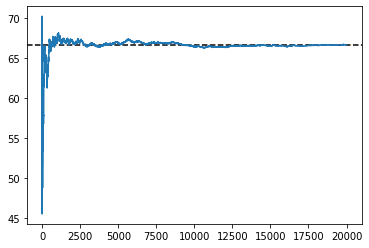

In [61]:
average_tracks_timeline = []
total_tracks = 0
i = 0
for num_tracks in dataset['num_tracks']:
    i += 1
    total_tracks += num_tracks
    average_tracks_timeline.append(total_tracks/i)
mu = dataset['num_tracks'].mean()
plt.axhline(y=mu, color = 'black', linestyle = '--')
plt.plot(average_tracks_timeline)

### 3.b Graph the change of the average_duration

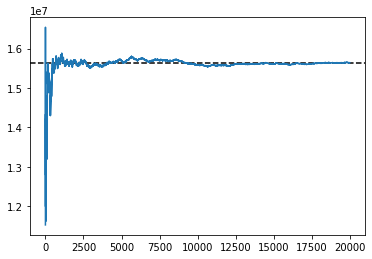

In [59]:
average_duration_timeline = []
total_duration = 0
i = 0
for duration_s in dataset['duration_ms']:
    i += 1
    total_duration += duration_s
    average_duration_timeline.append(total_duration/i)
mu = dataset['duration_ms'].mean()
plt.axhline(y=mu, color = 'black', linestyle = '--')
plt.plot(average_duration_timeline)

# [ ] konfidenzintervall? -> verteilung ja nicht klar???!!!


#### Note:
Gesetz der großen Zahlen!!

### 4.a Distribution of the duration

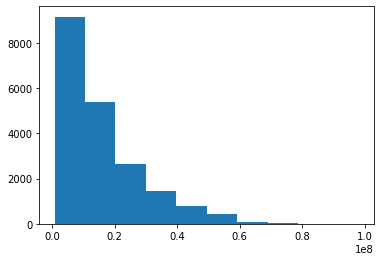

In [57]:
plt.hist(dataset['duration_ms'])
plt.show()

### 4.b Distribution of the track number

Idea: Weibull-distribution

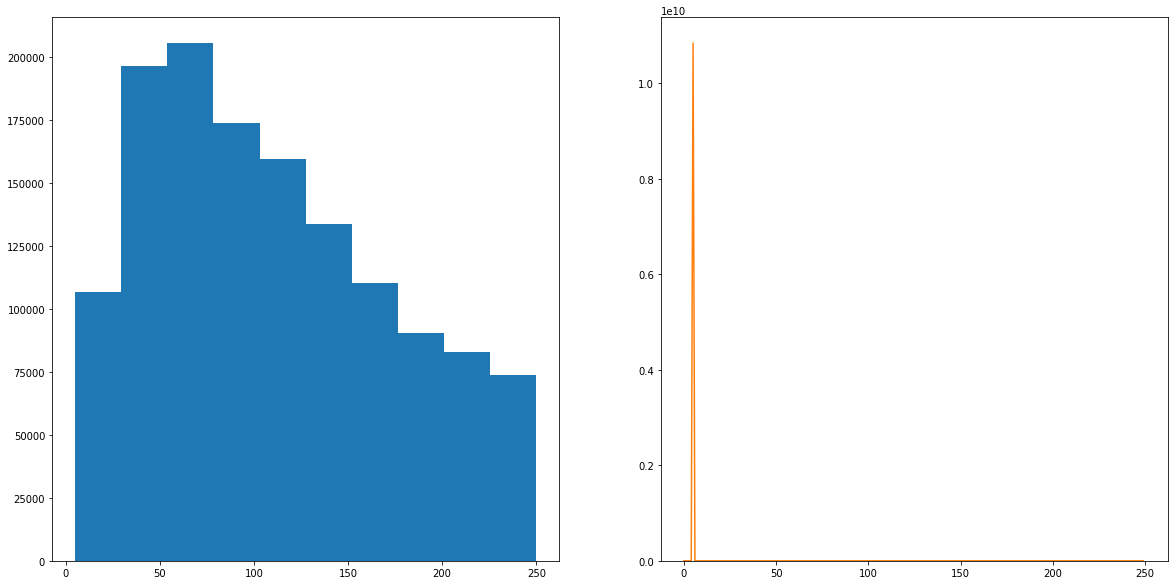

In [116]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].hist(dataset['num_tracks'])
axs[1].hist(dataset['num_tracks'], density=True)
#alpha, k, _, _ = stats.exponweib.fit(dataset['num_tracks'])
xgrid = np.arange(250)
#axs[1].plot(xgrid, stats.exponweib(alpha, k).pdf(xgrid))
#alpha, k, _= stats.weibull_max.fit(dataset['num_tracks'])
#axs[1].plot(xgrid, stats.weibull_max(alpha, k).pdf(xgrid))
alpha, k, _= stats.weibull_min.fit(dataset['num_tracks'])
axs[1].plot(xgrid, stats.weibull_min(alpha, k).pdf(xgrid))

plt.show()

(2.7967910692247244, 1.1281423315424424, -8.898925997047229, 72.72991327365673)


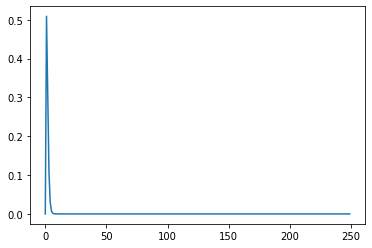

In [108]:
print(weilbulldistr)
xgrid = np.arange(250)
plt.plot(xgrid, stats.exponweib(weilbulldistr[0], weilbulldistr[1]).pdf(xgrid))
plt.show()

Idea: Pareto distribution

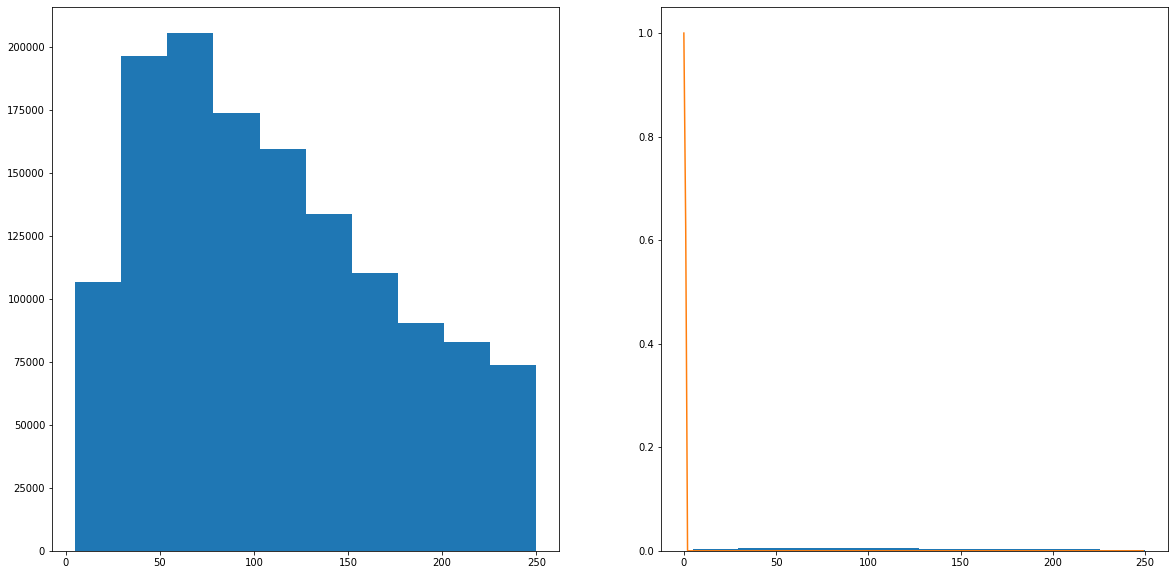

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].hist(dataset['num_tracks'])
axs[1].hist(dataset['num_tracks'], density=True)
#alpha, k, _, _ = stats.exponweib.fit(dataset['num_tracks'])
xgrid = np.arange(250)
c, _ , _ = stats.genpareto.fit(dataset['num_tracks'])
len(dist)
axs[1].plot(xgrid, stats.genpareto(c).pdf(xgrid))

plt.show()

Idea: chi2

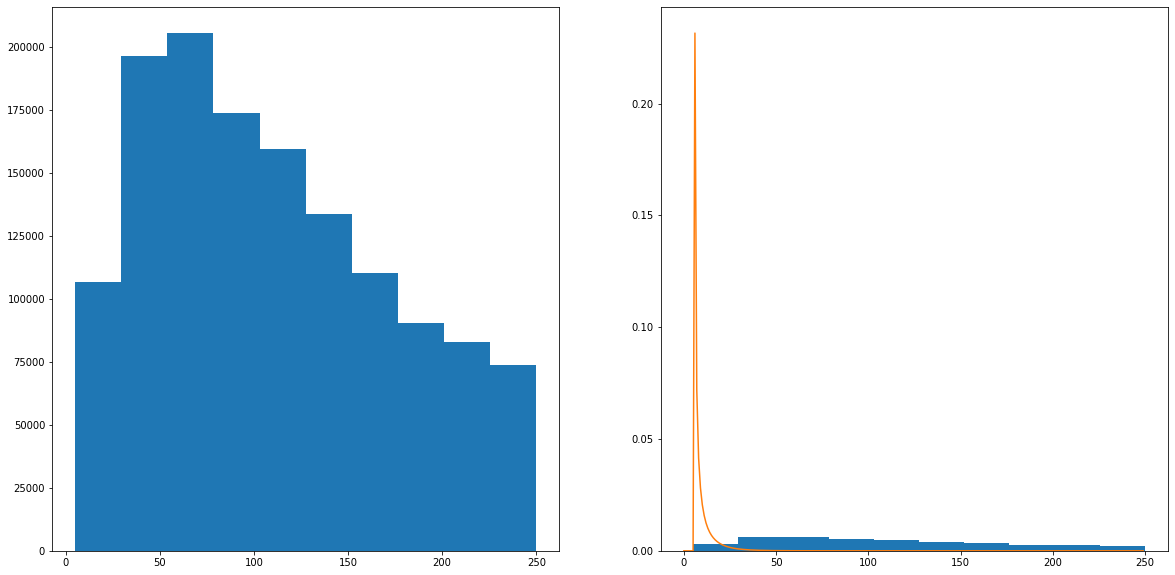

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].hist(dataset['num_tracks'])
axs[1].hist(dataset['num_tracks'], density=True)
#alpha, k, _, _ = stats.exponweib.fit(dataset['num_tracks'])
xgrid = np.arange(250)
df, _ , _ = stats.chi2.fit(dataset['num_tracks'])
axs[1].plot(xgrid, stats.chi2(df, _, _).pdf(xgrid))

plt.show()

## What is the number of unique tracks?:

In [86]:
dataset = get_data_tracks(pre=True)

In [87]:
dataset

artist_name  \
pid   name       num_tracks num_albums num_followers num_artists pos                      
0     Throwbacks 52         47         1             37          0        Missy Elliott   
                                                                 1       Britney Spears   
                                                                 2              Beyoncé   
                                                                 3    Justin Timberlake   
                                                                 4               Shaggy   
...                                                                                 ...   
19999 flow       10         10         1             9           5             Coldplay   
                                                                 6           Ed Sheeran   
                                                                 7         Grizzly Bear   
                                                                 8       Perfume Genius   
                                                                 9               Tennis   

                                                                                                 track_uri  \
pid   name       num_tracks num_albums num_followers num_artists pos                                         
0     Throwbacks 52         47         1             37          0    spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   
                                                                 1    spotify:track:6I9VzXrHxO9rA9A5euc8Ak   
                                                                 2    spotify:track:0WqIKmW4BTrj3eJFmnCKMv   
                                                                 3    spotify:track:1AWQoqb9bSvzTjaLralEkT   
                                                                 4    spotify:track:1lzr43nnXAijIGYnCT8M8H   
...                                                                                                    ...   
19999 flow       10         10         1             9           5    spotify:track:7D0RhFcb3CrfPuTJ0obrod   
                                                                 6    spotify:track:51ChrwmUPDJvedPQnIU8Ls   
                                                                 7    spotify:track:0iTpQYzJnYgh7kIxyq8A2O   
                                                                 8    spotify:track:3Gda1sTo2ZjbztjjsnAsP3   
                                                                 9    spotify:track:79sKMNtZ3Q4UOxPZ6BSfm9   

                                                                                                 artist_uri  \
pid   name       num_tracks num_albums num_followers num_artists pos                                          
0     Throwbacks 52         47         1             37          0    spotify:artist:2wIVse2owClT7go1WT98tk   
                                                                 1    spotify:artist:26dSoYclwsYLMAKD3tpOr4   
                                                                 2    spotify:artist:6vWDO969PvNqNYHIOW5v0m   
                                                                 3    spotify:artist:31TPClRtHm23RisEBtV3X7   
                                                                 4    spotify:artist:5EvFsr3kj42KNv97ZEnqij   
...                                                                                                     ...   
19999 flow       10         10         1             9           5    spotify:artist:4gzpq5DPGxSnKTe4SA8HAU   
                                                                 6    spotify:artist:6eUKZXaKkcviH0Ku9w2n3V   
                                                                 7    spotify:artist:2Jv5eshHtLycR6R8KQCdc4   
                                                                 8    spotify:artist:2ueoLVCXQ948OfhVvAy3Nn   
                                                                 9    spotify:artist:1ybAN3utgdoUL1MUCtH4QM   

                 

In [91]:
num_total_tracks = len(dataset['track_uri'])
#num_unique_tracks = len(dataset['track_uri'].unique())
num_unique_tracks = dataset['track_uri'].nunique()
ratio_playlist_unique_tracks = len(dataset.index)/num_unique_tracks
print(f'the total number of tracks: {num_total_tracks}, \nthe number of unique tracks: {num_unique_tracks}, \nthe ratio of unique tracks per playlist: {ratio_playlist_unique_tracks}')

the total number of tracks: 1333407, 
the number of unique tracks: 263469, 
the ratio of unique tracks per playlist: 5.0609635289161155


### Idea:
cumulative number of unique tracks as function -> hypothesis: there is a logarithmic function (later added playlist have no/nearly no effect) alternative linear function (with every playlist comes (round about) 2 new/unique tracks

In [89]:
dataset = dataset.reset_index()

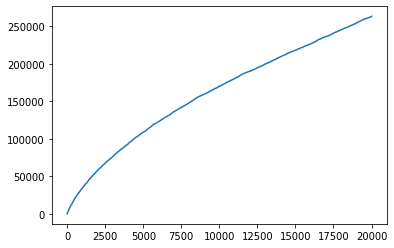

In [90]:
cum_unique_tracks = []
total_tracks = []
# note:
# plt.plot(dataset['track_uri'].cumsum()) 
# print(tmp.cumsum()) #numpy.cumsum()
#use (both) full ram -> no chance to use

#tmp = dataset['track_uri'].to_numpy()
#for i in range(len(tmp)):
    #cum_unique_tracks.append(len(np.unique(tmp[:i+1])))

#dataset = dataset.reset_index()
dataset_groups = dataset.groupby(['pid', 'name', 'num_tracks', 'num_albums', 'num_followers', 'num_artists'])

for group in dataset_groups:
    #print(group[1]['track_uri'])
    total_tracks.extend(group[1]['track_uri'].to_numpy())
    cum_unique_tracks.append(len(np.unique(total_tracks)))
    
#plt.plot(cum_unique_tracks)
#plt.show()


In [ ]:
plt.plot(cum_unique_tracks)
plt.show()

In [ ]:
#17:08 -> 19:02??? (20,000 Playlists)

#idea ploting is own cell

### Idea:
Are there missmatches between uri and trackname?